In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier


In [2]:
iris_df = pd.read_csv("IRIS_ Flower_Dataset.csv")

In [3]:
# Load the Iris dataset
url = "IRIS_ Flower_Dataset.csv"
#names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris_df = pd.read_csv(url)

# Display the first few rows of the dataset
print(iris_df.head())


   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [4]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
iris_df.groupby('species').size()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [6]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
iris_df.keys()

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [8]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
iris_df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
# Split the data into features (X) and target variable (y)
X = iris_df.iloc[:, :-1]
y = iris_df['species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Création d'un classificateur Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraînement du classificateur
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [12]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)


In [13]:
# Calcul de l'exactitude
exactitude_pourcentage = accuracy_score(y_test, y_pred) * 100
print(f"Exactitude : {exactitude_pourcentage:.2f}%")

# Affichage du rapport de classification
print("\nRapport de classification :")
print(classification_report(y_test, y_pred))


Exactitude : 100.00%

Rapport de classification :
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



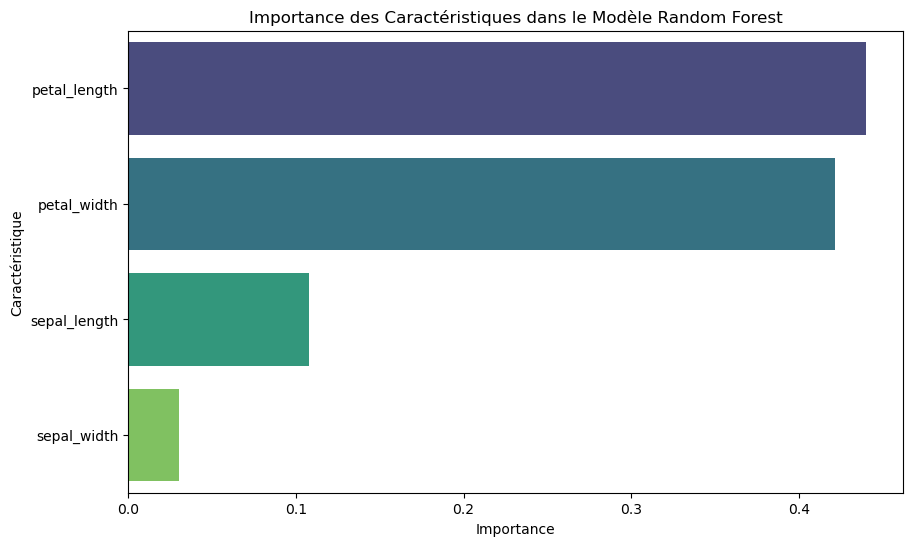

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Affichage des caractéristiques importantes dans le modèle Random Forest
feature_importances = rf_classifier.feature_importances_

# Création d'un DataFrame pour mieux afficher les caractéristiques importantes
feature_importance_df = pd.DataFrame({
    'Caractéristique': X.columns,
    'Importance': feature_importances
})

# Tri des caractéristiques par importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Affichage du graphique des caractéristiques importantes
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Caractéristique', data=feature_importance_df, palette='viridis')
plt.title('Importance des Caractéristiques dans le Modèle Random Forest')
plt.show()


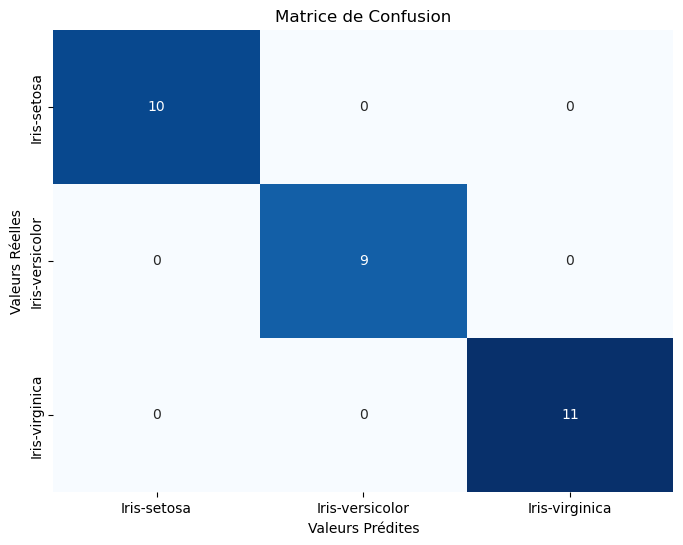

In [17]:
from sklearn.metrics import confusion_matrix

# Calcul de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# Affichage de la matrice de confusion sous forme de heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel('Valeurs Prédites')
plt.ylabel('Valeurs Réelles')
plt.title('Matrice de Confusion')
plt.show()


C:\miniconda\envs\py38\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


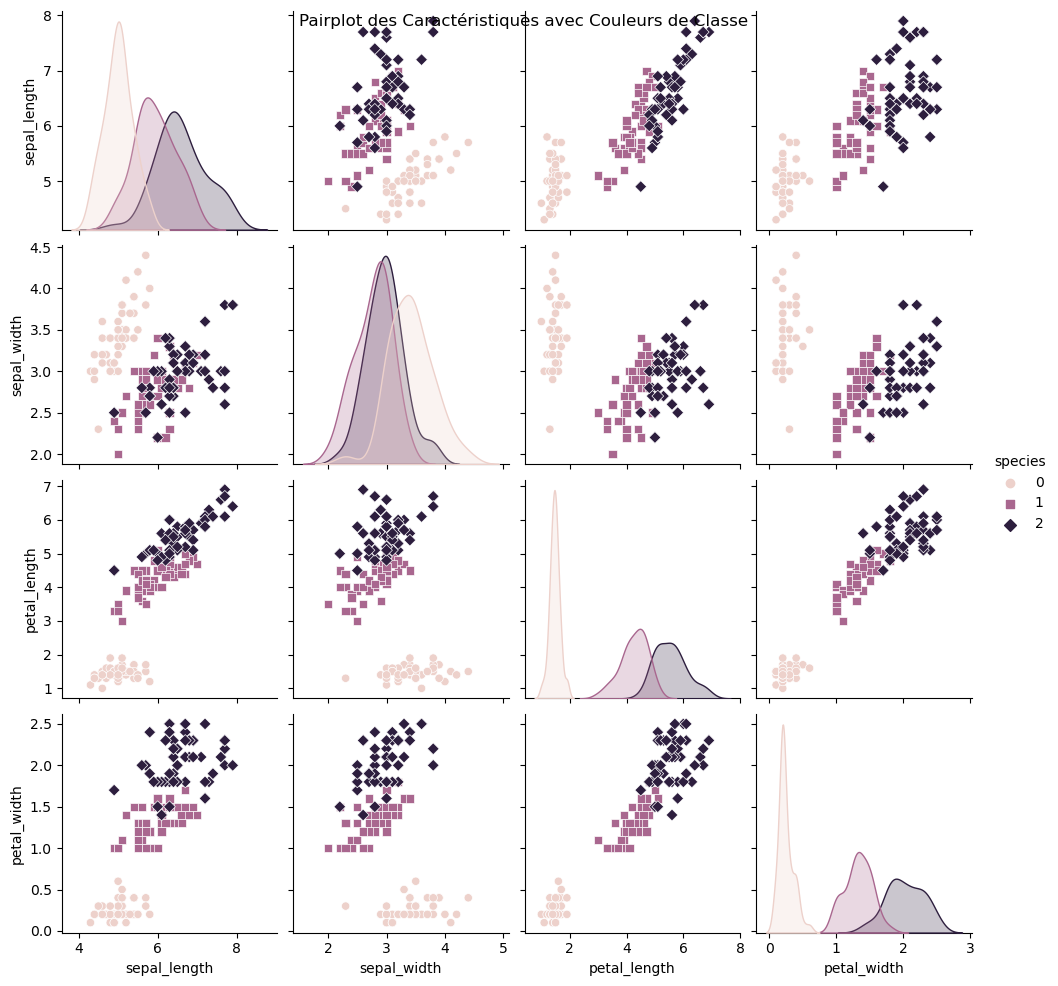

In [18]:
# Ajout de la classe au jeu de données pour le pairplot
iris_df['species'] = pd.Categorical(iris_df['species']).codes

# Création d'un pairplot
sns.pairplot(iris_df, hue='species', markers=["o", "s", "D"])
plt.suptitle('Pairplot des Caractéristiques avec Couleurs de Classe')
plt.show()


In [24]:
from sklearn import metrics

training_prediction = rf_classifier.predict(X_train)

print("Precision, Recall, Confusion matrix, in training\n")

# Precision Recall scores
print(metrics.classification_report(y_train, training_prediction, digits=3))

# Confusion matrix
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_train, training_prediction))


Precision, Recall, Confusion matrix, in training

                 precision    recall  f1-score   support

    Iris-setosa      1.000     1.000     1.000        40
Iris-versicolor      1.000     1.000     1.000        41
 Iris-virginica      1.000     1.000     1.000        39

       accuracy                          1.000       120
      macro avg      1.000     1.000     1.000       120
   weighted avg      1.000     1.000     1.000       120

Confusion Matrix:
[[40  0  0]
 [ 0 41  0]
 [ 0  0 39]]


In [25]:
import joblib

# Save the trained model to a file
model_filename = 'iris_trained_model.pkl'
joblib.dump(rf_classifier, model_filename)

print(f"Trained model saved as '{model_filename}'")


Trained model saved as 'iris_trained_model.pkl'
